In [5]:
# Importing the required packages
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
# Separating the data into labels and features
labels, data = data['emotion'], data.drop(['emotion','Usage'], axis=1)
data.head()

,pixels
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [8]:
# Here we will use only the first 2000 images for denoising
data = data[0:2000]
labels = labels[0:2000]

## Visualizing the noisy Images


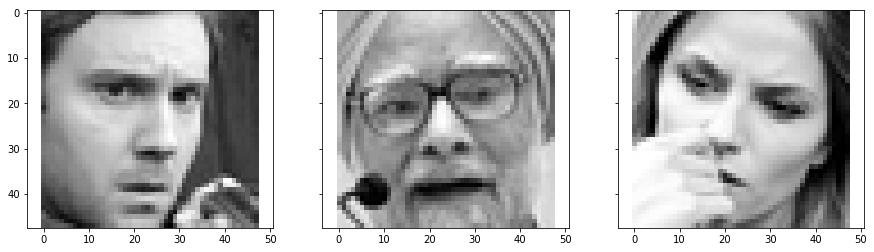

In [9]:
# Taking in the pixels of image i.e the features as a numpy array
pixel_data = data.values
pixel_data = pixel_data.astype(str)
pixel_data = np.core.defchararray.rsplit(pixel_data, sep=None, maxsplit=None)

# Visualizing the images using matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,4))

for x in range(len(axes)):
    first_row = np.asarray((pixel_data)[x][0]).astype('float32')
    vis_image = first_row.reshape(48,48)
    axes[x].imshow(vis_image,cmap='gray')

Now in order to use an autoencoder to reconstruct the images we will need to provide two types of inputs to the autoencoder :
the original images, and some noisy images. So, in the next block I will be adding some random noise to each image 

In [29]:
from skimage.util import random_noise, img_as_float

# Defining an empty list to hold values
noisy_image_data = []
# Here we parse through each element in pixel_data, extract and reshape the images and then finally resize it appropriately
for i in range(len(pixel_data)):
    row_data = np.asarray((pixel_data)[i][0]).astype('float32')
    # Normalizing the data to a value between 0 and 1
    noisy_image = random_noise(row_data, mode='gaussian', clip=True)
    reshaped_noisy_data = noisy_image.reshape(48,48)
    noisy_image_data.append(reshaped_noisy_data)
noisy_data = np.vstack(noisy_image_data)
noisy_data = noisy_data.reshape(2000, 48, 48, 1)
noisy_data.shape

ValueError: Images of type float must be between -1 and 1.

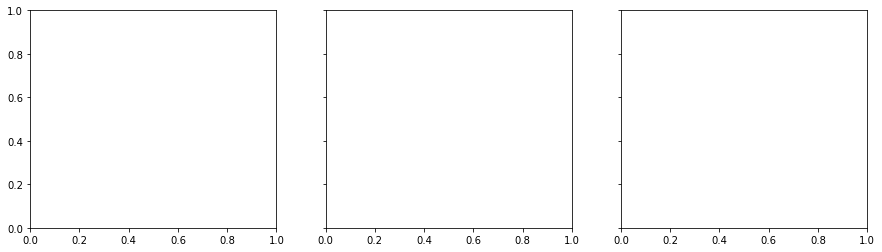

In [26]:
# Visualizing the noisy images using matplotlib
fig2, axes2 = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,4))

for x in range(len(axes2)):
    noisy_image = np.asarray((noisy_data)[0]).astype('float32')
    noisy_reshaped_data = noisy_image.reshape(48, 48)
    axes[x].imshow(noisy_reshaped_data,cmap='gray')